In [36]:
#leitura dos dados a serem analisados.

import pandas as pd

titanic = pd.read_csv(r"C:\Users\junio\OneDrive\Área de Trabalho\ARTE DOS DADOS\TITANIC\train.csv", sep=",", index_col=False)
titanic["Survived"] = titanic["Survived"].astype(int)

#### Item (a)

In [37]:
#Criação de uma nova coluna com as seguintes informações com as tags "Sobreviveu e Não_Sobreviveu"
#Conheço funções prontas para realização dessa tarefa, mas como o banco de dados tem menos de 1000 registros irei fazer
#utilizando as estruturas lógicas do python.

titanic["Sobreviveu"] = None

for i in range(len(titanic)):                            #Iniciação do loop para verificação registro a registro.
    if titanic["Survived"][i] == 0:                      #Se linha i da coluna "Survived " for igual a 0, então
        titanic["Sobreviveu"][i] = "Não_Sobreviveu"      #Linha i recebe a tag "Não_sobreviveu" indicando que o passegeiro faleceu.
    else:                                                #Caso a condição acima não seja satisfeita, então:                     
        titanic["Sobreviveu"][i] = "Sobreviveu"          #Linha i recebe a tag "Sobreviveu" indicando que o passageiro estava vivo após o incidente.


#### Item (b)

In [38]:
#Exclusão das colunas "PassengerId" e "Ticket"

titanic = titanic.drop(columns=["PassengerId", "Ticket"])


In [39]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Sobreviveu
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,Não_Sobreviveu
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,Sobreviveu
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,Sobreviveu
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,Sobreviveu
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,Não_Sobreviveu


In [40]:
#Calculando o número de sobreviventes ao acidente.

sobrevivente = 0                                #Variável para armazenar o número de sobrevivente.

for i in range(len(titanic)):                   #Loop que percorrerá o banco de dados na coluna "Survived" para verificar o número de sobreviventes. 
    if titanic["Survived"][i] == 1:             #Se na variável "Survived" linha i consta que o passageiro sobreviveu, então:
        sobrevivente = sobrevivente + 1         #Sobrevivente receberá mais 1 na sua contagem.

print(f"Pelo banco de dados temos que dos 891 passageiros registrados sobreviveram {sobrevivente}. Um total de {round(sobrevivente/len(titanic) * 100)}% de sobreviventes.")

Pelo banco de dados temos que dos 891 passageiros registrados sobreviveram 342. Um total de 38% de sobreviventes.


#### Item (c) e Item (d)

<AxesSubplot:>

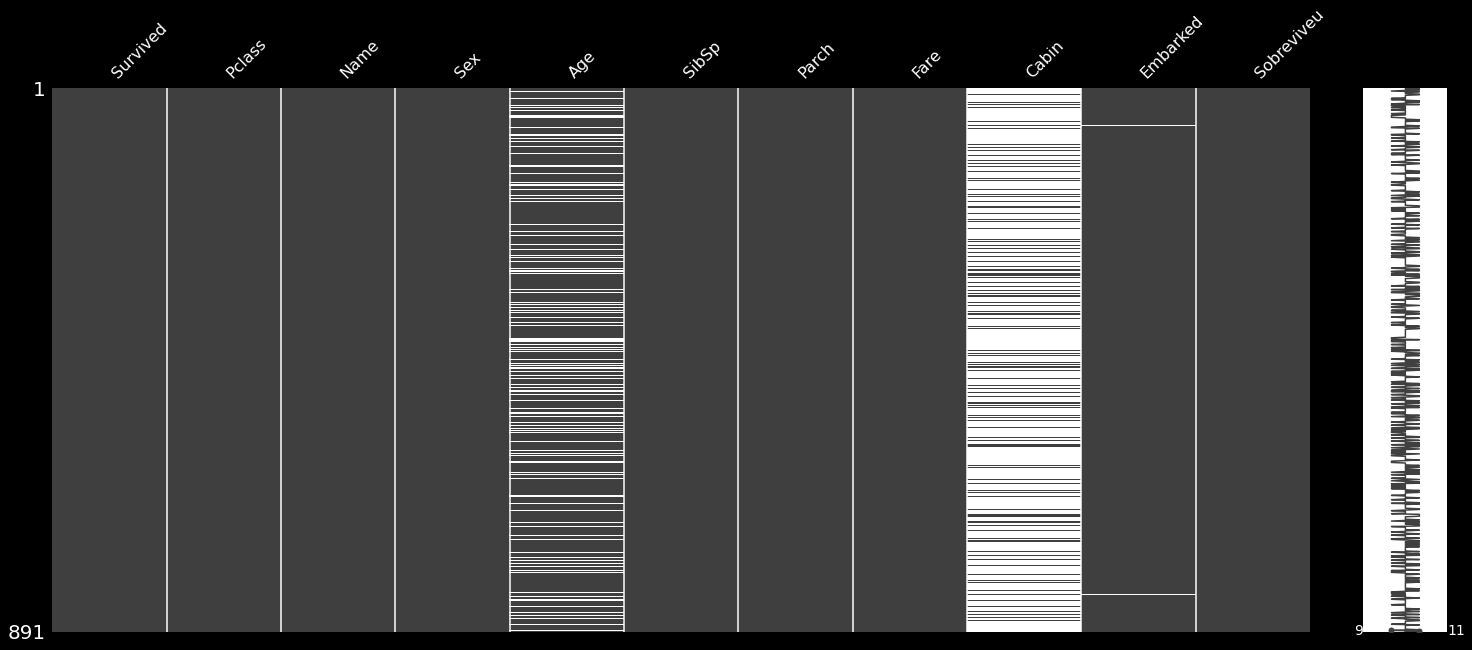

In [41]:
import missingno as mn #Biblioteca para ver a presença de NaN em cada coluna de forma visual.

mn.matrix(titanic)

#Nas barras abaixo, cada coluna representa uma variável no banco de dados. Nas barras completamente preenchidas temos as colunas do dataframe que
#não possuem valores faltante. As linhas brancas nas colunas "Age", "Cabin" e "Embarked" nos dizem que há registros "NaN" presentes, portanto, devemos 
#tratar desses casos.

In [14]:
titanic["Survived"].isna().sum() #Visto que o retorno o item (a) foi executada corretamente, era de se esperar que não teriamos valore "NaN" em "Survived".
titanic["Pclass"].isna().sum() #O método retornou que não há valores faltantes para a variável "Pclass".
titanic["Name"].isna().sum() #O método retornou que não há valores faltantes para a variável "Name".
titanic["Sex"].isna().sum() #O método retornou que não há valores faltantes para a variável "Sex".
titanic["SibSp"].isna().sum() #O método retornou que não há valores faltantes para a variável "SibSb".
titanic["Parch"].isna().sum() #O método retornou que não há valores faltantes para a variável "Parch".
titanic["Fare"].isna().sum() #O método retornou que não há valores faltantes para a variável "Fare".

0

In [42]:
titanic["Embarked"].isna().sum() #Há dois valores faltantes em "Embarked". Irei preenchê-los com o portão onde mais pessoas embarcaram.

len(titanic[titanic["Embarked"] == "C"]) # C == 168 registros.
len(titanic[titanic["Embarked"] == "S"]) # S == 687 registros.
len(titanic[titanic["Embarked"] == "Q"]) # Q == 77 registros.

# A maioria dos passageiros embarcaram em S - Southampton.

for i in range(len(titanic)):                               #loop para percorrer o dataframe
    if pd.isna(titanic["Embarked"][i]):                     #Verificação da linha onde "Embarked" == Nan
        titanic["Embarked"][i] = "S"                        #Atribuição de "S" os valores faltantes.

C:\Users\junio\AppData\Local\Temp\ipykernel_11016\3041641132.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic["Embarked"][i] = "S"                        #Atribuição de "S" os valores faltantes.


In [ ]:
#Na coluna "Age" existem 177 registro "NaN", nesse campo. Para solucionar esse problema irei preencher esses valores faltante com
#a mediana das idades. Não é adequa colocar 0 nesses registro pois há idades reais de passageiros com 0 anos. 
#Para tomar a mediana de uma conjunto irei utilizar uma função pronta do pandas.
#Outra solução seria preencher com média. Mais a frente veremos que a média e a mediana são medidas semelhantes para a variável idade.

titanic["Age"].isna().sum()                                 #Verificação do número de linhas com "Nan" em relação a coluna "Age".

for i in range(len(titanic)):                               #loop para percorrer o dataframe
    if pd.isna(titanic["Age"][i]):                          #Condição lógica: Se na linha i da coluna "Age" verificar "NaN" então executa.
        titanic["Age"][i] = titanic["Age"].median()         #Condição satisfeita, então a linha em questão receberá e mediada das idades.

titanic["Age"] = titanic["Age"].astype(int)                 #mudança de "Age" de float para int.


In [44]:
#Há 687 registros sem a cabine definida.
#Para resolver isso, será indicado na linha que a cabine é desconhecida. Outra alternativa a esse problema é preencher as cabines faltantes com as strings
#de maior ocorrência. Todavia, julgo que esse procedimento não é adequada pois cabines são lugares para poucas pessoas, de modo que nas atribuições
#poderiamos ter um grande número de pessoas no mesmo espaço, o que não parece real.

titanic["Cabin"].isnull().sum()
titanic["Cabin"] = titanic["Cabin"].fillna("Desconhecida")

In [51]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Sobreviveu
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7.2500,Desconhecida,S,Não_Sobreviveu
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.2833,C85,C,Sobreviveu
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250,Desconhecida,S,Sobreviveu
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53.1000,C123,S,Sobreviveu
4,0,3,"Allen, Mr. William Henry",male,35,0,0,8.0500,Desconhecida,S,Não_Sobreviveu


<AxesSubplot:>

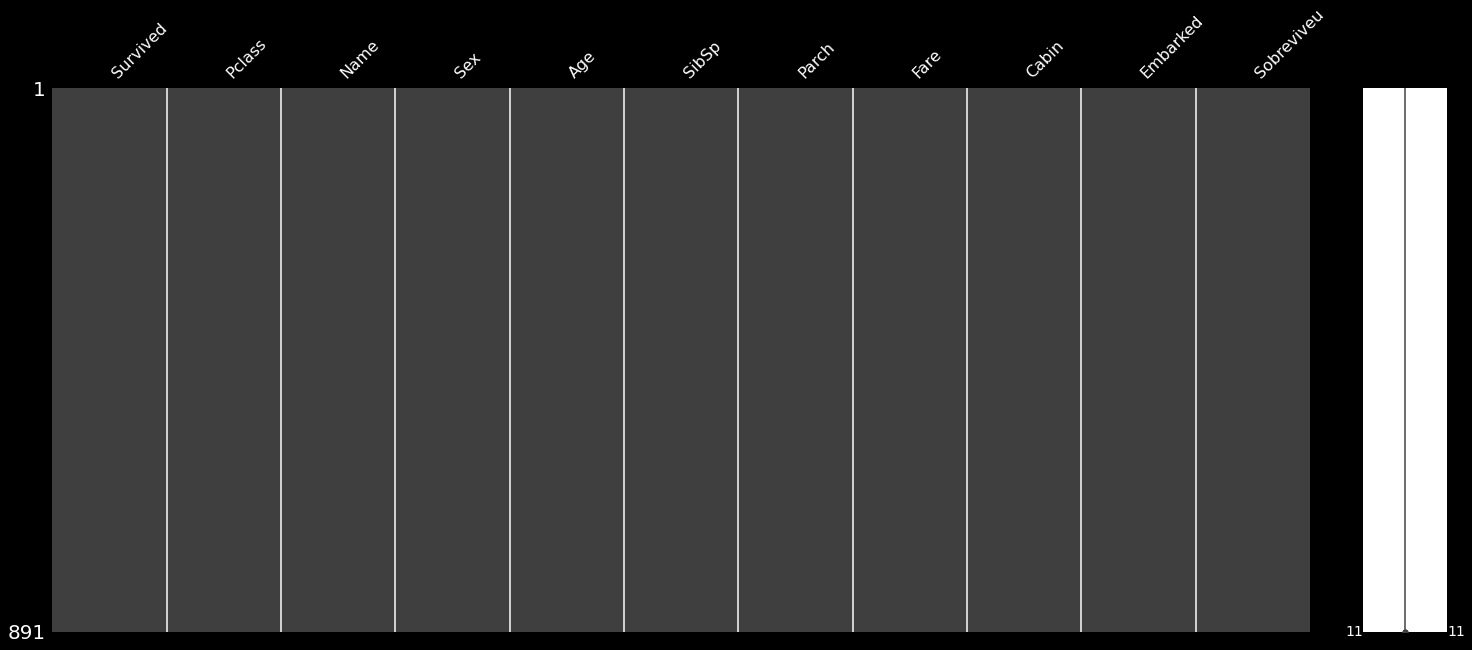

In [46]:
#Vejamos que as colunas agora estão completamente cinzas, nos mostrando que não há mais valores ausentes no banco.

mn.matrix(titanic)

#### Item(e)

In [47]:
#Pela função describe() do pandas conseguiremos obter algumas medidas descritivas do conjunto de dados. Para armazenas essa informações
#eu fiz da saída da função um novo conjunto de dados a parte do titacnic

Info = pd.DataFrame(titanic.describe())
Info = Info.T                                               #O dataframe resultante possui as medidas em formato linha. 
                                                            #Para facilitar a manipulação tomei a transposta do dataframe original.


#Função do pandas para calcular assimetris das variáveis "PClass", "Age", "SibSp", "Parch" e "Fare"

Info["skew"] = titanic.skew(axis = 0, skipna = True)        #Função do pandas que fornece a assimetria das distribuições de cada coluna numérica.
Info["kurt"] = titanic.kurt(axis = 0, skipna = True)        #Função que calcula a curtose das distribuições para cada variável numérica.

Info.head(10)

#Todas as colunas analisadas possuem os 891 registros.

#MÉDIA: A média da coluna "Survived" representa a porcentagem de passageiros sobreviventes, já que trata-se de uma variável binária.
#       A média de idade dos passageiros era de 29 anos.
#       Como as colunas "SibSp" e "Parch" não são binárias possuem muitos zeros elas não nos indicam informações relevantes.
#       Em "Fare" sabemos que os passageiro do titanic pagaram em média £$32 (libras esterlinas).

#DESVIO PADRÃO: Visto que "Survived" é binária, já era de se esperar que não teriamos uma grande variábilidade dos dados em relação a média.
#               O mesmo raciocínio se aplica a "Pclass" que possuí apenas 3 possíveis valores.
#               Já para idade temos uma grande intervalo de possibilidades. Observamos que o desvio padrão para "Age" é de 13 anos.
#               Ou seja, em relação a média a maioria dos dados estão a uma diferença de 13 anos de distância.
#               Para "Sibsp" e "Parch" temos que o valor máximo para essa coluna é 8 e 6 respectivamente. Ou seja, não a um grande intervalo para o dados
#               então o desvio é baixo.
#               Em "fare" vemos um desvio padrão de aproximadamente £$ 50. Temos ai um desvio bastante grande o que indica uma grande dispersão dos dados
#               em relaçao a média. Esse comportamento pode ser observado em casos de grande número de outlier, portanto, é mais adequado a utilização da
#               mediana de "Fare" visto que essa medida de tendência central possui menor influência na presença de valores exremos.

#MIN, QUARTIS e MAX: Em "Survived", como já sabiamos, pelo 3º quartil temos que ao menos 25% de passageiros sobreviveram ao naufrágio.
#                    Em "Pclass" observamos pelo 1º quartil que menos de 25% dos passageiros eram da primeira classe. A mediana dessa variável é a 3º classe
#                    o que nos indica que pelo menos 50% dos passageiros estavam nessa categoria.
#                    Como dito anteriormente, para "Age verificamos" que a mediana é de 28 anos, um valor relativamente próximo da média. Verifica-se que,
#                    no navio haviam passageiros com menos de 1 ano de idade. Os primeiros 25% dos passageiros tinham idade de até 22 anos, 50% tinham até 28
#                    anos e 75% tinham até 35 anos. Pelo Max dessa variável observamos que o passageiro mais velho tinha 80 anos de idade.
#                    Pelo mediana das coluna "SibSp" e "Parch" vemos que pelo 50% dos passageiros estavam sozinhos no navio. Enquanto que no mínimo 25% dos
#                    passageiros possuiam algum parente a bordo. Para a coluna #Sibps" vemos que havia um passageiro que possuia 8 cônuges\irmãos junto dele.
#                    Sendo esse o passageiro maior número de parentes desse tipo a bordo. Para "Parch" temos que o maior valor registrado para crianças e 
#                    parentes a bordo é de 6 pessoas.

#Assimetria: O coeficiente de assimetria mede o comportamento das caudas das distribuições de probabilidade para cada coluna do data frame.
#            Para as colunas "Survived", "Pclass", "SibSp" e "Parch" como os intervalos são pequenos e não há grande variabilidade dos dados, então
#            não parece adequado analisar o valor de skewness nessa variável.
#            Em "Age" observamos um coeficiente de assimetria de 0,5 o que nos indica que a media, mediana e a moda estão próximas entre si. Consequentemente,
#            temos que os dados em "Age" estão igualmente distribuídos e relativamente próximos a média. Sendo assim, por esse valor podemos supor que as
#            caudas na distribuição estão relativamente equilibradas de modo que a variável de idade possui um comportamento próximo da normal.
#            Em "Fare" temos um coeficiente de 4.79, bastante longe de zero em comparação a "Age". Para nós, isso é um indicativo de que
#            a cauda da distribuição de "Fare" é longa a direita. Como numa distribuição f. Além disso por conta desse deslocamento a direita é de esperar que
#            a média é maior que a mediana como vimos, de modo que pelo menos 50% dos dados são pequenos, e valores extremos estão longe da média, o que explica o
#            comportamento do desvio padrão.

#Curtose: a curtose compara a altura e o peso das caudas das distribuição de variáveis em relação a normal. 
#         Novamente, para as variável "Survived", "Pclass", "SibSp" e "Parch" não iremos analisar a curtose pelos mesmos motivos anteriores.
#         "Fare" possui um valor de curtose alto indicando que há muitos valores extremos presentes nessa variável.
#         "Age" possui uma curtose de aproximadamente 1, o que nos indica uma Distribuição Leptocúrtica, onde a distribuição tem sua calda mais pesada e seu
#         pico é mais alto. Um indicativo de que os dados estão proximos a média. 

C:\Users\junio\AppData\Local\Temp\ipykernel_11016\367691769.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Info["skew"] = titanic.skew(axis = 0, skipna = True)        #Função do pandas que fornece a assimetria das distribuições de cada coluna numérica.
C:\Users\junio\AppData\Local\Temp\ipykernel_11016\367691769.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Info["kurt"] = titanic.kurt(axis = 0, skipna = True)        #Função que calcula a curtose das distribuições para cada variável numérica.


,count,mean,std,min,25%,50%,75%,max,skew,kurt
Survived,891.0,0.383838,0.486592,0.0,0.0000,0.0000,1.0,1.0000,0.478523,-1.775005
Pclass,891.0,2.308642,0.836071,1.0,2.0000,3.0000,3.0,3.0000,-0.630548,-1.280015
Age,891.0,29.345679,13.028212,0.0,22.0000,28.0000,35.0,80.0000,0.503570,0.998391
SibSp,891.0,0.523008,1.102743,0.0,0.0000,0.0000,1.0,8.0000,3.695352,17.880420
Parch,891.0,0.381594,0.806057,0.0,0.0000,0.0000,0.0,6.0000,2.749117,9.778125
Fare,891.0,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292,4.787317,33.398141


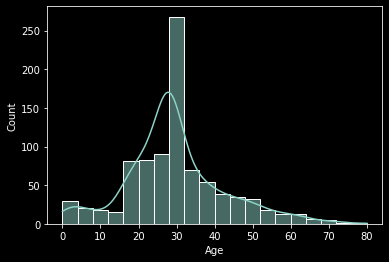

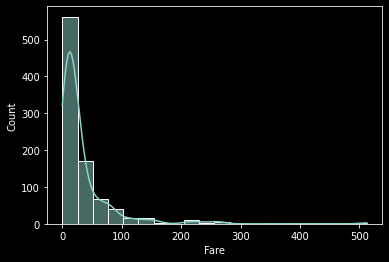

In [ ]:
#distribuição probabilistica
import numpy as np
import seaborn as sbs
import matplotlib.pyplot as plt

def histogram_plot(titanic,field):
  return sbs.histplot(data=titanic,x=i,kde=True,bins=20)

field = ["Age","Fare"]

for i in field:
  
  hist=histogram_plot(titanic,i)
  plt.show()


#Nos gráficos abaixo vemos visualmente que as interpretações das assimetrias e curtoses estão indicando o caminho correto.

#### Item (f)

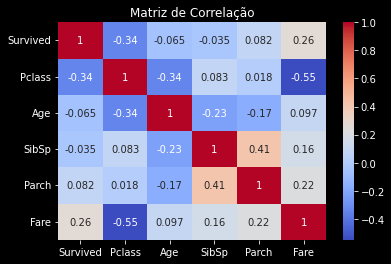

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular a matriz de correlação
correlation_matrix = titanic.corr() #Função do pandas para plotar matriz de correlação das variáveis numéricas.

# Visualizar a matriz de correlação como um heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

#A matriz de correção nos indica qual a relação entre duas variáveis númericas. Sendo que uma correlação = 0 nos indica que as duas variáveis não possuem
#relação linear entre si. Correlação = 1, nos diz que há forte relação entre duas variávei, de modo que o comportamento de uma é diretamente proporcional ao da outra.
#Uma correlação = -1 indica uma relação diretamente inversa entre as variáveis.

#Dentre os valores observados abaixo  vale ressaltar a relação entre as seguintes variáveis.

# "Survived" e "PClass": existe uma correlação de -0,34 entre essas variávies. Um indicativo de que a medida que a classe do passageiros aumento a 
# chance dele sobreviver diminui. Ou seja, pessoas na 1º classe tinham maior probabilidade de sobrevivência que pessoas na 3º. Entretanto, o valor 0,34 
# indica que essa correlação entre as variáveis é moderada.
# "Survived" e "Fare": Sendo essa correlação = 0,26 vemos que há um leve indício de que quanto maior o preço da passagem paga pelo tripulante maior é a
# chance dele sobreviver. Apesar de assim interpretarmos, devemos considerar que magnitude da relação é fraca.
# "Pclass" e "Age": Aqui a correlação também é de -0,34. Uma relação de força moderada entre as variáveis que pode indicar que pessoas mais velhas estavam
# na primeira classe, enquanto que os mais jovem estavam em sua maioria nas demais.
# "PClass" e "Fare": A Correlação é de -0,55. Ou seja, de uma força grande indicando que quanto maior o preço da tarifa mais próximo da primeira classe o 
# passageiro estará. Esse comportamento era de fato o esperado.
# "Age" e "SbiSp": Correlação = -0,23. Podemos concluir que entre as variáveis de idade há uma relação fraca de que quanto mais velho tripulante maior é a chance
# dele estar sozinho no navio.
# "SibSp" e "Parch": Correlação = 0,41. Como é de esperar, a correlação nos informa que quanto maior o número de cônjuges e irmão de um passageiros
# a bordo, há uma moderada chance de que maior seja o número de filhos e parentes no navio.
# "Parch" e "Fare": Correlação = 0,22 indica que há uma relação positica fraca entre o número de parente de um tripulante e o valor do ticket por ele pago.
# Ou seja, para aqueles que estavam acompanhados no návio há um chance de que eles tenham pagado mais pela passagem.

# Todas as demais correlação são suficiente próximas de 0 o que nos indica ausência de relação entre as variáveis.

#### Item (g)

In [57]:
# Porcentagem de sobreviventes por sexo.

S_Homem = 0                                             #S_Homem == Homens aobreviventes.
T_Homem = 0                                             #T_Homem == Total de homens no návio.
S_Mulher = 0                                            #S_Mulher == Mulheres sobreviventes
T_Mulher = 0                                            #T_Mulher == Total de mulheres no návio.

for i in range(len(titanic)):                           #Loop para percorrer o dataset.
    if titanic["Sex"][i] == "male":                     #Se o sexo do tripulante é homem, então.
        T_Homem = T_Homem + 1                           #Soma-se 1 ao total de homens a bordo.
        if titanic["Sobreviveu"][i] == "Sobreviveu":      #Caso esse homem tenha sobrevivido.
            S_Homem = S_Homem + 1                       #Soma-se 1 ao total de homens sobreviventes.
    else:                                               #Se o tripulante não é homem, então.
        T_Mulher = T_Mulher + 1                         #Soma-se 1 ao total de mulheres a bordo.
        if titanic["Sobreviveu"][i] == "Sobreviveu":      #Caso essa mulher tenha sobrevivido, então
            S_Mulher = S_Mulher + 1                     #Soma-se 1 ao total de mulheres sobreviventes.

print(f"No navio haviam {T_Homem} homens e {T_Mulher} mulheres.")
print(f"{round(S_Homem/len(titanic) * 100)}% dos homens e {round(S_Mulher/len(titanic) * 100)}% das mulheres do total de tripulantes sobreviveram ao desastres.")
print(f"{round(S_Homem/T_Homem * 100)}% do total de homem no navio sobreviveram.")
print(f"{round(S_Mulher/T_Mulher * 100)}% do total de Mulher no navio sobreviveram.")

No navio haviam 577 homens e 314 mulheres.
12% dos homens e 26% das mulheres do total de tripulantes sobreviveram ao desastres.
19% do total de homem no navio sobreviveram.
74% do total de Mulher no navio sobreviveram.


#### Item (h) e Item(l)

In [58]:
#Média da tarifa para por sexo.

T_fare_H = 0                                                                    #T_fare_H == Somatório da tárifa paga por homens.
T_fare_M = 0                                                                    #T_fare_M == Somatório da tárifa paga por mulheres.


for i in range(len(titanic)):                                                   #Loop para somar o valor o total pago por homem em "Fare"
    if titanic["Sex"][i] == "male":                                             #Se Passageiro na linha i é homem, então.
        T_fare_H = T_fare_H + titanic["Fare"][i]                                #Somatório da tarifa por homem recebe a tarifa paga pelo passageiro na linha i.
    else:                                                                       #Caso o passageiro seja mulher, então.
        T_fare_M = T_fare_M + titanic["Fare"][i]                                #Somatório da tarifa por mulher recebe a tarifa paga pelo passageiro na linha i.

print(f"Homens pagaram em média ${round(T_fare_H / T_Homem)}.")                 #Print e cálculo de média para homens.
print(f"Mulher pagaram em média ${round(T_fare_M / T_Mulher)}.")                #Print e cálculo de média para mulheres.

print("Pela comparação direta da média dos dois grupos, vê-se o valor médio do embarque pago por homens é menor que o pago pelas mulheres.")
print(f"Todavia, {round(T_Homem/len(titanic) * 100)}% dos tripulantes são homens, enquanto {round(T_Mulher/len(titanic) * 100)}% são mulheres. ", end="")
print(f"Sendo assim, uma comparação feita direto pela média não é adequada.")
print("Será melhor se visualizarmos pela mediana. Entretanto, para compararmos os valores obtidos deve-se levar em consideração o tipo de classe de embarque.")
print("Para isso, separemos 1º, 2º e 3º classe e classifiquemos por sexo, e daí calculemos a mediana.")

Pclass1_H = titanic[(titanic["Pclass"] == 1) & (titanic["Sex"] == "male")]      #Separação do dados em relação aos homens na primeira clase.
PC1_H = round(Pclass1_H["Fare"].median())                                       #Obtenção da mediana da variável Fare em relação a homens da primeira classe.
Pclass1_M = titanic[(titanic["Pclass"] == 1) & (titanic["Sex"] == "female")]    #Dados apenas com mulheres da primeira classe.
PC1_M = round((Pclass1_M["Fare"]).median())                                     #Mediana de Fare para mulheres na primeira classe.
Pclass2_H = titanic[(titanic["Pclass"] == 2) & (titanic["Sex"] == "male")]      #Dados Homens Segunda classe.
PC2_H = round((Pclass2_H["Fare"]).median())                                     #Mediana de Fare para homens na segunda classe.
Pclass2_M = titanic[(titanic["Pclass"] == 2) & (titanic["Sex"] == "female")]    #Mulheres na segunda classe.
PC2_M = round((Pclass2_M["Fare"]).median())                                     #Mediana de Fare para mulheres na segunda classe.
Pclass3_H = titanic[(titanic["Pclass"] == 3) & (titanic["Sex"] == "male")]      #Homens na terceira classe.
PC3_H = round((Pclass3_H["Fare"]).median())                                     #Mediana de Fare para homens na terceira classe.
Pclass3_M = titanic[(titanic["Pclass"] == 3) & (titanic["Sex"] == "female")]    #Mulheres na terceira classe.
PC3_M = round((Pclass3_M["Fare"]).median())                                     #Mediana de Fare para mulheres na terceira classe.

print("") #Quebra de linha
print(f"Para passageiros na primeira classe, o valor mediano pago por homens foi de ${PC1_H} enquanto que para mulheres foi de ${PC1_M}.")
print(f"Para passageiros na segunda classe, o valor mediano pago por homens foi de ${PC2_H} enquanto que para mulheres foi de ${PC2_M}.")
print(f"Para passageiros na segunda classe, o valor mediano pago por homens foi de ${PC3_H} enquanto que para mulheres foi de ${PC3_M}.")
print("")
print("Mesmo comparando homens e mulheres por classe vemos que mulheres pagam mais que homens.")


Homens pagaram em média $26.
Mulher pagaram em média $44.
Pela comparação direta da média dos dois grupos, vê-se o valor médio do embarque pago por homens é menor que o pago pelas mulheres.
Todavia, 65% dos tripulantes são homens, enquanto 35% são mulheres. Sendo assim, uma comparação feita direto pela média não é adequada.
Será melhor se visualizarmos pela mediana. Entretanto, para compararmos os valores obtidos deve-se levar em consideração o tipo de classe de embarque.
Para isso, separemos 1º, 2º e 3º classe e classifiquemos por sexo, e daí calculemos a mediana.

Para passageiros na primeira classe, o valor mediano pago por homens foi de $41 enquanto que para mulheres foi de $83.
Para passageiros na segunda classe, o valor mediano pago por homens foi de $13 enquanto que para mulheres foi de $22.
Para passageiros na segunda classe, o valor mediano pago por homens foi de $8 enquanto que para mulheres foi de $12.

Mesmo comparando homens e mulheres por classe vemos que mulheres pagam m

#### Item (i) e Item(l)

In [77]:
#Valor médio pago por classe.

Fare_Pclass1 = 0                                                            #Variável para armazenar o total pago pela primeira classe.
PC1 = 0                                                                     #Total de passageiros na primeira classe.
Fare_Pclass2 = 0                                                            #Variável para armazenar o total pago pela segunda classe.
PC2 = 0                                                                     #Total de passageiros na segunda classe.
Fare_Pclass3 = 0                                                            #Variável para armazenar o total pago pela terceira classe.
PC3 = 0                                                                     #Total de passageiros na terceira classe.

for i in range(len(titanic)):                                               #Criação de um loop para somar o valor de tárifa de cada classe.
    if titanic["Pclass"][i] == 1:                                           #Se passageiro da linha i estava na primeira classe, então.
        PC1 = PC1 + 1                                                       #Soma-se 1 ao número de passageiro na primeira classe.
        Fare_Pclass1 = Fare_Pclass1 + titanic["Fare"][i]                    #Soma-se ao total da tarifa paga pela primeira classe o valor de "Fare" da linha i.
    elif titanic["Pclass"][i] == 2:                                         #Caso contrário, se o passageiro na linha i está na segunda classe, então.
        PC2 = PC2 + 1                                                       #Soma-se 1 ao número de passageiro na segunda classe.
        Fare_Pclass2 = Fare_Pclass2 + titanic["Fare"][i]                    #Soma-se ao total da tarifa paga pela segunda classe o valor de "Fare" da linha i.
    else:                                                                   #Caso nenhuma das condições seja satisfeira, então o passageiro é da terceira classe.
        PC3 = PC3 + 1                                                       #Soma-se 1 ao número de passageiro na terceira classe.
        Fare_Pclass3 = Fare_Pclass3 + titanic["Fare"][i]                    #Soma-se ao total da tarifa paga pela terceira classe o valor de "Fare" da linha i.

print(f"Na primeira classe havia {PC1} passageiros que pagaram em média ${round(Fare_Pclass1/PC1)}.")
print(f"Na segunda classe havia {PC2} passageiros que  pagaram em média ${round(Fare_Pclass2/PC2)}.")
print(f"Na terceira classe havia {PC3} passageiros que  pagaram em média ${round(Fare_Pclass3/PC3)}.")
print("Como era de se esperar passageiros da 1º classe pagaram pagaram mais que os demais.")
print("A diferença do valor médio da passagem entre 2º e 3º classe é muito inferior quando comparado com a 1º classe.")

Na primeira classe havia 216 passageiros que pagaram em média $84.
Na segunda classe havia 184 passageiros que  pagaram em média $21.
Na terceira classe havia 491 passageiros que  pagaram em média $14.
Como era de se esperar passageiros da 1º classe pagaram pagaram mais que os demais.
A diferença do valor médio da passagem entre 2º e 3º classe é muito inferior quando comparado com a 1º classe.


#### Item (j) e Item(l)

In [ ]:
#Média de "Fare" com base no portão de embarque do passageiro.

Fare_C = 0                                          #Variável para contabilizar o total pago por passageiros que embarcaram em Cherbourg.
Num_C = 0                                           #Variável para armazenar o total de passageiros que embacaram em Cherbourg.
Fare_S = 0                                          #Variável para contabilizar o total pago por passageiros que embarcaram em Southampton.
Num_S = 0                                           #Variável para armazenar o total de passageiros que embacaram Southampton.
Fare_Q = 0                                          #Variável para contabilizar o total pago por passageiros que embarcaram em Queenstown.
Num_Q = 0                                           #ariável para armazenar o total de passageiros que embacaram Queenstown.

for i in range(len(titanic)):                       #Loop para percorrer o DataSet.
    if titanic["Embarked"][i] == "C":               #Se "Embarked" na posição i é igual a Cherbourg, então.
        Num_C = Num_C + 1                           #Soma-se 1 a número de ingressante no navio nessa cidade.
        Fare_C = Fare_C + titanic["Fare"][i]        #Acrescenta-se a variável Fare_C o valor pago em tárifa de embarque no portão de Cherbourg.
    elif titanic["Embarked"][i] == "S":             #Se "Embarked" na posição i é igual a Southampton, então.
        Num_S = Num_S + 1                           #Soma-se 1 a número de ingressante no navio nessa cidade.
        Fare_S = Fare_C + titanic["Fare"][i]        #Acrescenta-se a variável Fare_S o valor pago em tárifa de embarque no portão de Southampton.
    else:                                           #Se nenhuma das condições foi satisfeita então o embarque ocorreru em Queenstown.
        Num_Q = Num_Q + 1                           #Soma-se 1 a número de ingressante no navio nessa cidade.
        Fare_Q = Fare_Q + titanic["Fare"][i]        #Acrescenta-se a variável Fare_S o valor pago em tárifa de embarque no portão de Queenstown.

print(f"Em Cherbourg embarcaram {Num_C} passageiros e em média o valor pago por embarque nesse local foi de ${round(Fare_C/Num_C)}")
print(f"Em Queenstown embarcaram {Num_Q} passageiros e em média o valor pago por embarque nesse local foi de ${round(Fare_Q/Num_Q)}")
print(f"Em Southampton embarcaram {Num_S} passageiros e em média o valor pago por embarque nesse local foi de ${round(Fare_S/Num_S)}")
print(f"Em média o valor pago por passageiros que embarcaram em Cherbourg foi muito superior as demais cidades.")
print("Não se verifica que o número de passageiros da primeira classe que embarcaram em Cherbourg é o maior. Esse comportamente desse estar ocorrendo devido a presença de muito outlier nessa cidade.")

Em Cherbourg embarcaram 168 passageiros e em média o valor pago por embarque nesse local foi de $60
Em Queenstown embarcaram 77 passageiros e em média o valor pago por embarque nesse local foi de $13
Em Southampton embarcaram 646 passageiros e em média o valor pago por embarque nesse local foi de $16
Em média o valor pago por passageiros que embarcaram em Cherbourg foi muito superior as demais cidades.
Não se verifica que o número de passageiros da primeira classe que embarcaram em Cherbourg é o maior. Esse comportamente desse estar ocorrendo devido a presença de muito outlier nessa cidade.


In [ ]:
#Criação de uma nova coluna que categoriza o valor pago no ticket

titanic["Fare_Range"] = None

for i in range(len(titanic)):
    if titanic["Pclass"][i] == 1:
        titanic["Fare_Range"][i] = "Alto"
    elif titanic["Pclass"][i] == 2:
        titanic["Fare_Range"][i] = "Medio"
    else:
        titanic["Fare_Range"][i] = "Baixo"

In [70]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Sobreviveu,Fare_Range
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7.2500,Desconhecida,S,Não_Sobreviveu,Baixo
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.2833,C85,C,Sobreviveu,Alto
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250,Desconhecida,S,Sobreviveu,Baixo
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53.1000,C123,S,Sobreviveu,Alto
4,0,3,"Allen, Mr. William Henry",male,35,0,0,8.0500,Desconhecida,S,Não_Sobreviveu,Baixo


In [110]:
Max_P1 = 0
Min_P1 = 0
Max_P2 = 0
Min_P2 = 0
Max_P3 = 0
Min_P3 = 0

for i in range(len(titanic)):
    if titanic["Pclass"][i] == 1:
        if titanic["Fare"][i] > Max_P1:
            Max_P1 = titanic["Fare"][i]
        if titanic["Fare"][i] != 0 and i < 890:                         #Se a tarifa não for zerada e o valor da variável de loop não for o máximo, então. - (Se deixarmos i = 890 a condição na linha seguinte será a posição 891 que não existe e estaremos gerando um erro.)
            if titanic["Fare"][i+1] < titanic["Fare"][i]:
                Min_P1 = titanic["Fare"][i]
    if titanic["Pclass"][i] == 2:
        if titanic["Fare"][i] > Max_P2:
            Max_P2 = titanic["Fare"][i]
        if titanic["Fare"][i] != 0 and i < 890:                         #Se a tarifa não for zerada e o valor da variável de loop não for o máximo, então. - (Se deixarmos i = 890 a condição na linha seguinte será a posição 891 que não existe e estaremos gerando um erro.)
            if titanic["Fare"][i+1] < titanic["Fare"][i]:
                Min_P2 = titanic["Fare"][i]
    if titanic["Pclass"][i] == 3:
        if titanic["Fare"][i] > Max_P3:
            Max_P3 = titanic["Fare"][i]
        if titanic["Fare"][i] != 0 and i < 890:                         #Se a tarifa não for zerada e o valor da variável de loop não for o máximo, então. - (Se deixarmos i = 890 a condição na linha seguinte será a posição 891 que não existe e estaremos gerando um erro.)
            if titanic["Fare"][i+1] < titanic["Fare"][i]:
                Min_P3 = titanic["Fare"][i]

print(f"A tarifa mais cara paga por um passageiro na primeira classe foi de ${round(Max_P1)}.")
print(f"A tarifa mais barata paga por um passageiro na primeira classe foi de ${round(Min_P1)}.")
print(f"A tarifa mais cara paga por um passageiro na segunda classe foi de ${round(Max_P2)}.")
print(f"A tarifa mais barata paga por um passageiro na segunda classe foi de ${round(Min_P2)}.")
print(f"A tarifa mais cara paga por um passageiro na terceira classe foi de ${round(Max_P3)}.")
print(f"A tarifa mais barata paga por um passageiro na terceira classe foi de ${round(Min_P3)}.")

A tarifa mais cara paga por um passageiro na primeira classe foi de $512.
A tarifa mais barata paga por um passageiro na primeira classe foi de $30.
A tarifa mais cara paga por um passageiro na segunda classe foi de $74.
A tarifa mais barata paga por um passageiro na segunda classe foi de $10.
A tarifa mais cara paga por um passageiro na terceira classe foi de $70.
A tarifa mais barata paga por um passageiro na terceira classe foi de $29.


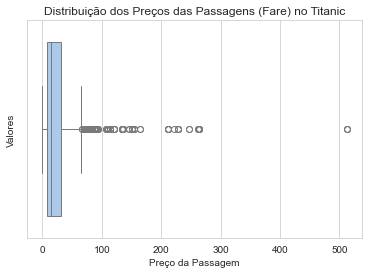

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Criar o boxplot
sns.boxplot(x='Fare', data=titanic)

# Personalizar o gráfico
plt.title('Distribuição dos Preços das Passagens (Fare) no Titanic')
plt.xlabel('Preço da Passagem')
plt.ylabel('Valores')
sns.set_style("whitegrid")  # Define o estilo do gráfico
sns.set_palette("pastel")  # Define a paleta de cores

plt.show()

#No boxplot abaixo os círculos em cinza indicam todos os outlier da variável "Fare".

In [74]:
# Calcular os quartis e o IQR
Q1 = titanic['Fare'].quantile(0.25)
Q3 = titanic['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Definir os limites
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Contar os outliers
outliers = titanic[(titanic['Fare'] < lower_bound) | (titanic['Fare'] > upper_bound)]
num_outliers = len(outliers)

print(f"Número de outliers na coluna Fare é de {num_outliers} pontos.")

Número de outliers na coluna Fare é de 116 pontos.


#### Item (n)

In [72]:
#Criação de uma nova coluna que categoriza o valor pago no ticket

titanic["Fare_Range"] = None                    #Criar uma coluna para armazenar as categorias de cada linha.

for i in range(len(titanic)):                   #loop para percorrer o dataframe.
    if titanic["Pclass"][i] == 1:               #Se "Pclass" na posição i for igual a 1º classe então,
        titanic["Fare_Range"][i] = "Alto"       #A Fare_Range posição i recebe categoria alto.
    elif titanic["Pclass"][i] == 2:             #Se "Pclass" na posição i for igual a 2º classe então,
        titanic["Fare_Range"][i] = "Medio"      #A Fare_Range posição i recebe categoria medio.
    else:                                       #Caso nenhuma das condições anteriores seja satisfeita, então o passageiros estava na 3º classe logo,
        titanic["Fare_Range"][i] = "Baixo"      #A Fare_Range posição i recebe categoria baixo.

In [73]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Sobreviveu,Fare_Range
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7.2500,Desconhecida,S,Não_Sobreviveu,Baixo
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.2833,C85,C,Sobreviveu,Alto
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250,Desconhecida,S,Sobreviveu,Baixo
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53.1000,C123,S,Sobreviveu,Alto
4,0,3,"Allen, Mr. William Henry",male,35,0,0,8.0500,Desconhecida,S,Não_Sobreviveu,Baixo


In [79]:
titanic.to_csv(r"C:\Users\junio\OneDrive\Área de Trabalho\ARTE DOS DADOS\TITANIC\titanic.csv", sep=";", index=False)